<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/supplementary_tables/SupplementaryTable5/qPSC_vs_aPSC_Fibroblast_genesetenrrichmentAnalysis_v2_camera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GSEA -- fibroblast by timepoint
# SupplementaryTable5 activatedFibroblast_GSEA



# Setup

## link Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Installing pakages on Colab

In [ ]:
!pip install setuptools-scm scanpy anndata leidenalg watermark pandas==1.5.3 umap-learn==0.5.3 plotnine==0.8.0 panel muon anndata2ri triku ray harmonypy celltypist rpy2==3.4.5 sccoda importlib-metadata decoupler omnipath seaborn==0.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 kB 27.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 72.3 MB/s eta 0:00:00
     

In [ ]:
%%capture
%%!
git clone https://github.com/has2k1/scikit-misc.git
cd scikit-misc
python setup.py install

In [ ]:
!sudo apt-get install msttcorefonts -qq

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 17.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libmspack0:amd64.
(Reading database ... 122542 files and directories currently installed.)
Preparing to unpack .../00-libmspack0_0.10.1-2_amd64.deb ...
Unpacking libmspack0:amd64 (0.10.1-2) ...
Selecting previously unselected package cabextract.
Preparing to unpack .../01-cabextract_1.9-3_amd64.deb ...
Unpacking cabextract (1.9-3) ...
Selecting previously unselected package libfontenc1:amd64.
Preparing to unpack .../02-libfontenc1_1%3a1.1.4-0ubuntu1_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-0ubun

In [ ]:
!sudo apt install font-manager

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  font-manager-common font-viewer
Suggested packages:
  file-roller nautilus-font-manager nemo-font-manager yelp
The following NEW packages will be installed:
  font-manager font-manager-common font-viewer
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,740 kB of archives.
After this operation, 9,394 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager-common amd64 0.7.7-0.3 [1,545 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-viewer amd64 0.7.7-0.3 [27.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager amd64 0.7.7-0.3 [168 kB]
Fetched 1,740 kB in 3s (693 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be 

In [ ]:
!rm ~/.cache/matplotlib -rf

#Load font

In [ ]:
import matplotlib.font_manager as fm

In [ ]:
print(fm.findfont('Arial'))

/usr/share/fonts/truetype/msttcorefonts/Arial.ttf


#Import other

In [ ]:
from __future__ import annotations
import numpy as np
import pandas as pd

import scanpy as sc
import anndata as ad
import decoupler
import seaborn.objects as so

import session_info

In [ ]:
# R integration
import anndata2ri
import logging
from rpy2.robjects import r
import random
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [ ]:
!sudo apt-get install -y libharfbuzz-dev libharfbuzz-dev libfribidi-dev libcairo2-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libcairo-script-interpreter2 libffi-dev
  libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev libharfbuzz-gobject0
  libharfbuzz-icu0 liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev
  libsepol1-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libgraphite2-utils
The following NEW packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libcairo-script-interpreter2 libcairo2-dev
  libffi-dev libfribidi-dev libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev
  libharfbuzz-dev libharfbuzz-gobject0 libharfbuzz-icu0 liblzo2-2 libmount-dev
  libpixman-1-dev libselinux1-dev libsepol1-dev libxcb-render0-dev
  libxcb-shm0-dev
0 upgraded, 19 newly installed, 0 to remove and 24 not up

In [ ]:
!Rscript -e "options(Ncpus = 8)" -e "install.packages(c('BiocManager','statmod'))" -e "BiocManager::install(c('BiocGenerics','edgeR', 'DelayedArray', 'DelayedMatrixStats','limma', 'lme4', 'S4Vectors', 'SingleCellExperiment','SummarizedExperiment', 'batchelor', 'HDF5Array','terra', 'ggrastr'))"

Streaming output truncated to the last 5000 lines.
../inst/include/Eigen/src/Core/DenseCoeffsBase.h:55:30: warning: ignoring attributes on template argument ‘Eigen::internal::packet_traits<double>::type’ {aka ‘__vector(2) double’} [-Wignored-attributes]
../inst/include/Eigen/src/Core/DenseCoeffsBase.h: In instantiation of ‘Eigen::Index Eigen::internal::first_default_aligned(const Eigen::DenseBase<Derived>&) [with Derived = Eigen::CwiseBinaryOp<Eigen::internal::scalar_conj_product_op<double, double>, const Eigen::Block<Eigen::Matrix<double, -1, 1>, -1, 1, false>, const Eigen::Block<Eigen::Block<Eigen::Matrix<double, -1, -1>, -1, 1, true>, -1, 1, false> >; Eigen::Index = long int]’:
../inst/include/Eigen/src/Core/Redux.h:225:63:   required from ‘static Eigen::internal::redux_impl<Func, Derived, 3, 0>::Scalar Eigen::internal::redux_impl<Func, Derived, 3, 0>::run(const Derived&, const Func&) [with Func = Eigen::internal::scalar_sum_op<double, double>; Derived = Eigen::internal::redux_evalu

In [ ]:
%%R
library(SingleCellExperiment)
library(limma)

In [ ]:
%load_ext watermark
%watermark
%watermark --iversions -v -m -p numpy,scipy,sklearn,anndata,scanpy,muon,rpy2,triku,anndata2ri

Last updated: 2023-04-26T03:20:58.810012+00:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 7.34.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.10.147+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 7.34.0

numpy     : 1.22.4
scipy     : 1.10.1
sklearn   : 1.2.2
anndata   : 0.9.1
scanpy    : 1.9.3
muon      : 0.1.3
rpy2      : 3.4.5
triku     : 2.1.6
anndata2ri: 1.1

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.10.147+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

seaborn     : 0.12.2
logging     : 0.5.1.2
numpy       : 1.22.4
session_info: 1.0.0
anndata2ri  : 1.1
rpy2        : 3.4.5
pandas      : 1.5.3
matplotlib  : 3.7.1
scanpy      : 1.9.3
anndata     : 0.9.1
decoupler   : 1.3.4



In [ ]:
%%R
sessionInfo()

R version 4.3.0 (2023-04-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] limma_3.55.10               SingleCellExperiment_1.21.1
 [3] SummarizedExperiment_1.29.1 Biobase_2.59.0             
 [5] GenomicRanges_1.51.4        G

# Setup WD

In [ ]:
folder='/content/drive/MyDrive/CIP_v3_data/CIP_all/FullDataset/'

samplename='CIP_all_v3_noW6_8_'
random_state=42


# import data as H5AD

###CIP all

In [ ]:
#load data
adata_full=sc.read('/content/drive/MyDrive/CIP_v3_data/CIP_all/FullDataset/datasets/CIP_all_v3_no_W6_8__filteredNormalized_annotated_2023-02-14.h5ad')

In [ ]:
#change to get fibroblast cells
adata= adata_full[adata_full.obs['annotated'].isin(['Fibroblast']),:].copy()
adata

AnnData object with n_obs × n_vars = 17654 × 21686
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'batch', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'outlier', 'S_score', 'G2M_score', 'phase', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'ADM', 'Acinar', 'Ductal', 'annotated', 'annotated_fine', 'annotated_ADM', 'annotated_immunegrouped'
    var: 'feature_type', 'id', 'mito', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'triku_distance', 'triku_distance_uncorrected', 'triku_highly_variable'
    uns: 'QC_colors', '

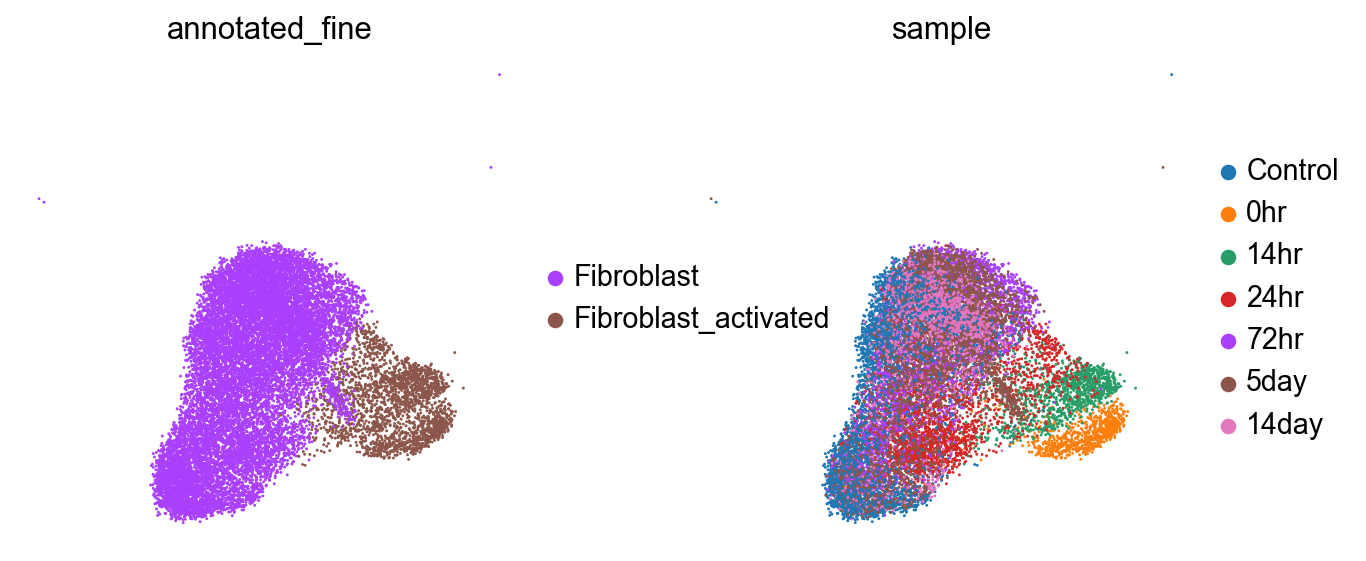

In [ ]:
sc.pl.umap(
    adata,
    color=["annotated_fine", "sample"],
       vmin='p20',vmax='p99',
    frameon=False,
    ncols=2,
)

In [ ]:
clusters=adata.obs['annotated_fine'].value_counts().index.tolist()

In [ ]:
#method : {‘logreg’, ‘t-test’, ‘wilcoxon’, ‘t-test_overestim_var’} | None (default: None)
sc.tl.rank_genes_groups(adata, 'annotated_fine', method='wilcoxon',n_genes=adata.shape[1],key_added='wilcoxon',corr_method='bonferroni',
                        use_raw=False,layer='PFlog1pPF_normalization')


In [ ]:
# Initialize an empty dataframe to store the results
result_df = pd.DataFrame()

# Iterate over the celltype_condition values in the clusters list
for celltype_condition in clusters:
    # Get dataframe of DE results for condition vs. rest
    temp_df = sc.get.rank_genes_groups_df(adata, celltype_condition, key="wilcoxon")
    # Subset to highly variable genes and sort by absolute score
    # chose only one
        ##only highly_variable genes
    #temp_df = temp_df.set_index("names").sort_values("scores", key=np.abs, ascending=False)[["scores"]].loc[adata.var["highly_variable"]]
        # all the genes
    temp_df = temp_df.set_index("names").sort_values("scores", key=np.abs, ascending=False)[["scores"]]

    # Rename the 'scores' column to the current celltype_condition value
    temp_df = temp_df.rename(columns={"scores": celltype_condition})
    # Concatenate the current result to the overall result dataframe
    result_df = pd.concat([result_df, temp_df], axis=1)

result_df = result_df.rename_axis(["s"], axis=1)

In [ ]:
result_df

s,Fibroblast,Fibroblast_activated
names,,
Dcn,72.483696,-72.483696
Timp1,-71.792664,71.792664
Fkbp11,-65.965202,65.965202
Serp1,-65.890671,65.890671
Gsn,65.484200,-65.484200
...,...,...
Gm27168,0.000000,0.000000
Amy2a4,0.000000,0.000000
Scrg1,0.000000,0.000000


#Loading geneset

## function to load geneset from gmt or txt file

In [ ]:
from pathlib import Path

In [ ]:
#from gmt
def gmt_to_decoupler(pth: Path) -> pd.DataFrame:
    """
    Parse a gmt file to a decoupler pathway dataframe.
    """
    from itertools import chain, repeat

    pathways = {}

    with Path(pth).open("r") as f:
        for line in f:
            name, _, *genes = line.strip().split("\t")
            pathways[name] = genes

    return pd.DataFrame.from_records(
        chain.from_iterable(zip(repeat(k), v) for k, v in pathways.items()),
        columns=["geneset", "genesymbol"],
    )

In [ ]:
# choose your directory
%cd /content/drive/MyDrive/MsigDB/

/content/drive/MyDrive/MsigDB


#Run GSEA

#hallmark

In [ ]:
geneset1 = gmt_to_decoupler('/content/drive/MyDrive/MsigDB/mh.all.v2023.1.Mm.symbols.gmt')

In [ ]:
geneset1

,geneset,genesymbol
0,HALLMARK_TNFA_SIGNALING_VIA_NFKB,Klf6
1,HALLMARK_TNFA_SIGNALING_VIA_NFKB,Jag1
2,HALLMARK_TNFA_SIGNALING_VIA_NFKB,Dennd5a
3,HALLMARK_TNFA_SIGNALING_VIA_NFKB,Gch1
4,HALLMARK_TNFA_SIGNALING_VIA_NFKB,B4galt1
...,...,...
7184,HALLMARK_PANCREAS_BETA_CELLS,Mafb
7185,HALLMARK_PANCREAS_BETA_CELLS,Scgn
7186,HALLMARK_PANCREAS_BETA_CELLS,Spcs1
7187,HALLMARK_PANCREAS_BETA_CELLS,Srprb


In [ ]:
# Filtering genesets
geneset_size = geneset1.groupby("geneset").size()
gsea_genesets = geneset_size.index[(geneset_size > 15) & (geneset_size < 500)]

In [ ]:
gsea_results = pd.DataFrame()

for col in result_df.columns:
    scores, norm, pvals = decoupler.run_gsea(
        pd.DataFrame(result_df[col]).sort_values(by=col, ascending=False).T,
        geneset1[geneset1["geneset"].isin(gsea_genesets)],
        source="geneset",
        target="genesymbol",
    )
    col_scores_norm_pvals = pd.concat(
        {
            f"{col}_score": scores.T,
            f"{col}_norm": norm.T,
            f"{col}_pval": pvals.T,
        },
        axis=1,
    ).droplevel(level=1, axis=1)
    gsea_results = pd.concat([gsea_results, col_scores_norm_pvals], axis=1)

In [ ]:
folder='/content/drive/MyDrive/CIP_v3_data/CIP_all/GSEA/'
# save the dataframe as a csv file
gsea_results.to_csv(folder+'qPSC_wilcoxon_Hallmark.csv', index=True)

In [ ]:
gsea_results.head(20)

,Fibroblast_score,Fibroblast_norm,Fibroblast_pval,Fibroblast_activated_score,Fibroblast_activated_norm,Fibroblast_activated_pval
source,,,,,,
HALLMARK_ADIPOGENESIS,-0.519104,-6.710372,1.941283e-11,0.519105,6.827441,8.644253e-12
HALLMARK_ALLOGRAFT_REJECTION,-0.486537,-4.454370,8.414007e-06,0.486537,4.448345,8.653458e-06
HALLMARK_ANDROGEN_RESPONSE,-0.436489,-3.735567,1.872928e-04,0.436489,3.703189,2.129060e-04
HALLMARK_ANGIOGENESIS,-0.377012,-1.773777,7.609996e-02,0.377012,1.854393,6.368301e-02
HALLMARK_APICAL_JUNCTION,-0.424542,-4.700017,2.601399e-06,0.424542,4.631130,3.636759e-06
HALLMARK_APICAL_SURFACE,-0.357220,-1.734185,8.288520e-02,0.357220,1.720416,8.535682e-02
HALLMARK_APOPTOSIS,-0.298045,-3.044220,2.332841e-03,0.298045,3.082785,2.050732e-03
HALLMARK_BILE_ACID_METABOLISM,-0.364250,-3.069710,2.142667e-03,0.364250,3.125720,1.773706e-03
HALLMARK_CHOLESTEROL_HOMEOSTASIS,-0.487108,-3.776314,1.591663e-04,0.487108,3.719327,1.997541e-04


In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns


source
HALLMARK_MYC_TARGETS_V1                      -0.810242
HALLMARK_E2F_TARGETS                         -0.707976
HALLMARK_OXIDATIVE_PHOSPHORYLATION           -0.707114
HALLMARK_G2M_CHECKPOINT                      -0.679753
HALLMARK_MTORC1_SIGNALING                    -0.672638
HALLMARK_DNA_REPAIR                          -0.659245
HALLMARK_GLYCOLYSIS                          -0.577833
HALLMARK_UNFOLDED_PROTEIN_RESPONSE           -0.672484
HALLMARK_MITOTIC_SPINDLE                     -0.508143
HALLMARK_ADIPOGENESIS                        -0.519104
HALLMARK_MYC_TARGETS_V2                      -0.797213
HALLMARK_FATTY_ACID_METABOLISM               -0.552237
HALLMARK_PI3K_AKT_MTOR_SIGNALING             -0.605767
HALLMARK_UV_RESPONSE_UP                      -0.506041
HALLMARK_HEME_METABOLISM                     -0.457089
HALLMARK_PEROXISOME                          -0.571886
HALLMARK_PROTEIN_SECRETION                   -0.535529
HALLMARK_XENOBIOTIC_METABOLISM               -0.452107
HAL

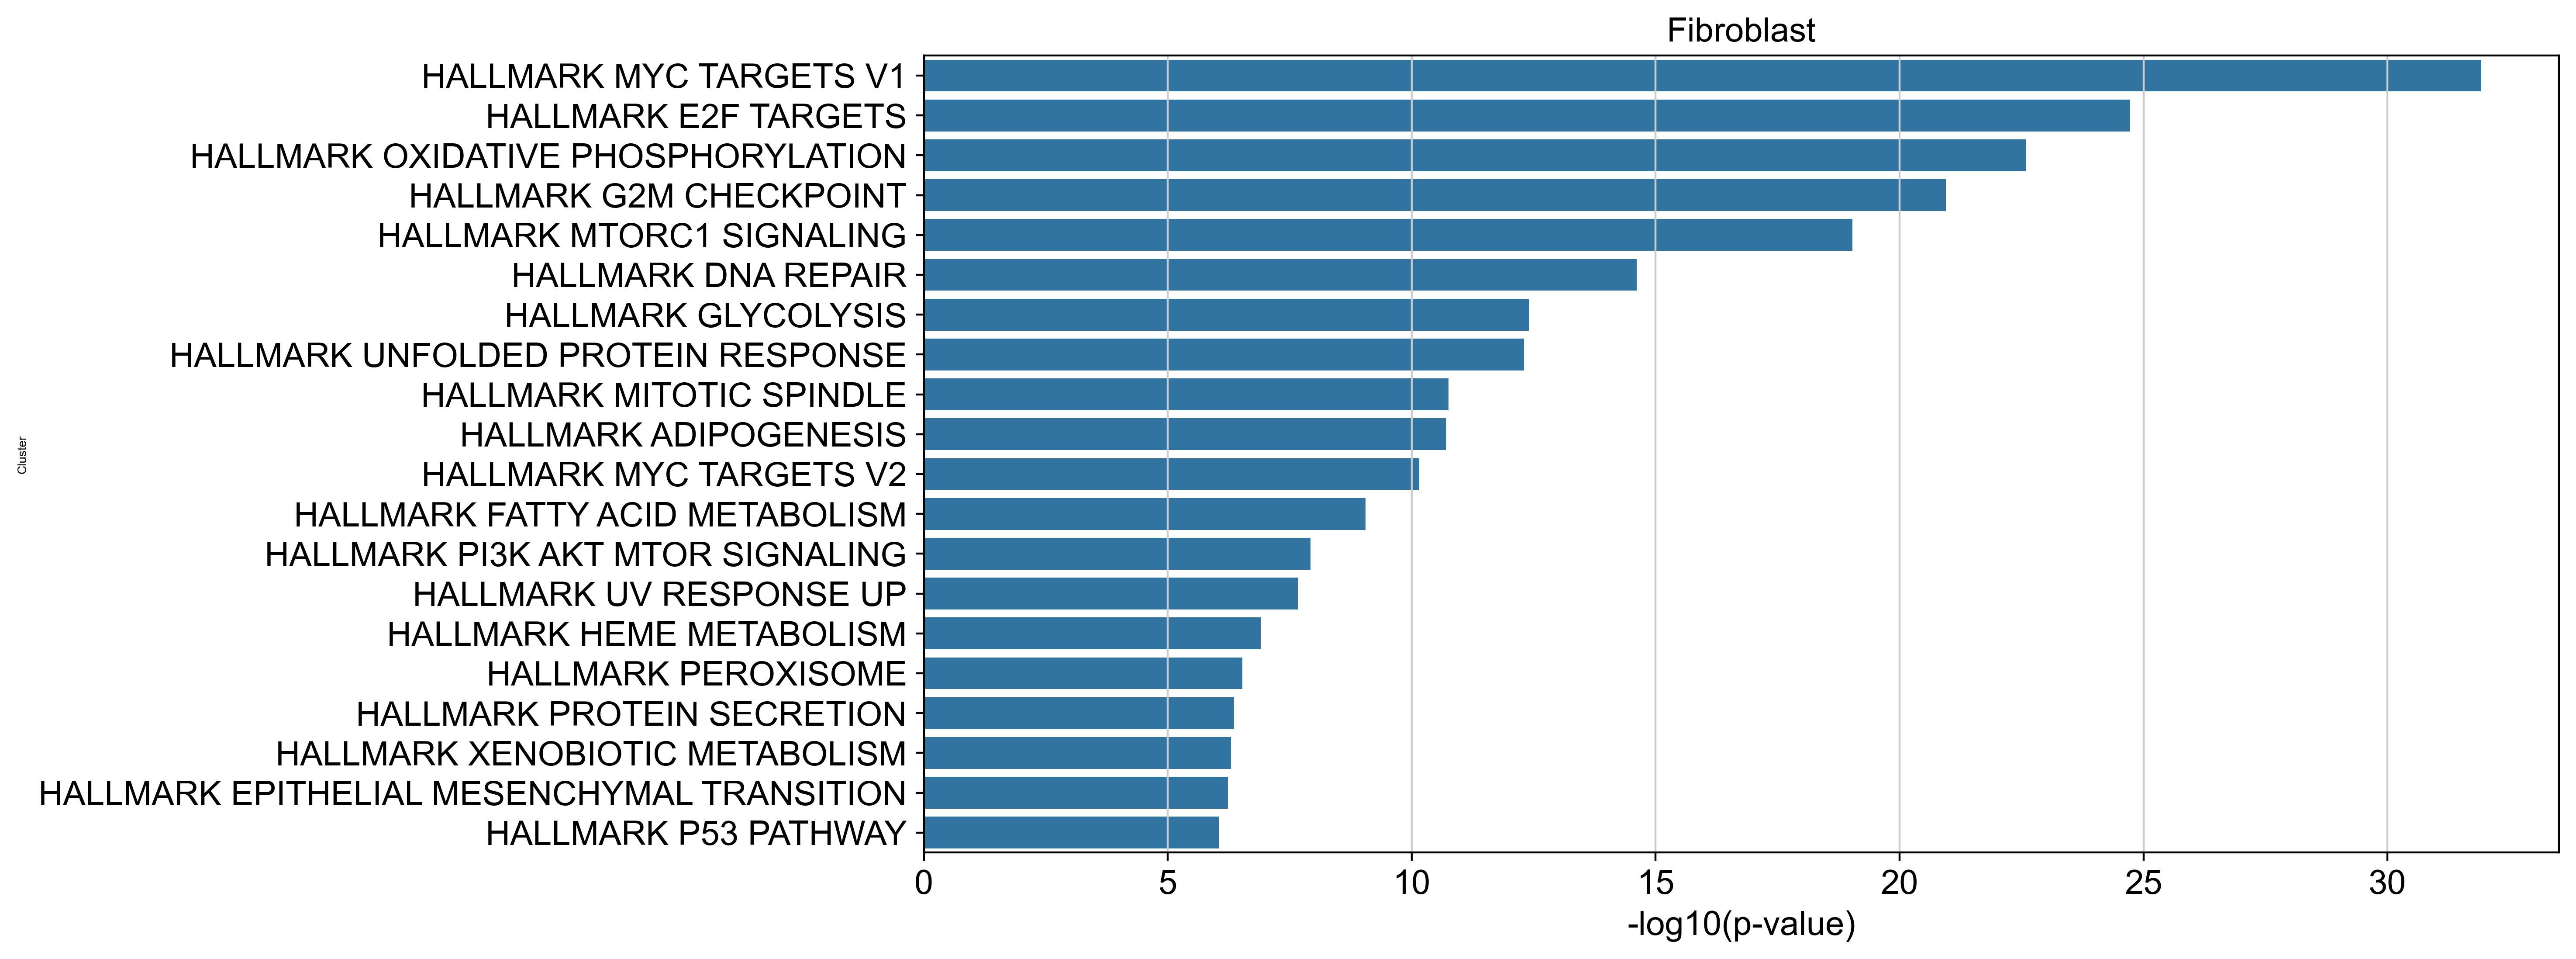

source
HALLMARK_MYC_TARGETS_V1                       0.810242
HALLMARK_E2F_TARGETS                          0.707976
HALLMARK_OXIDATIVE_PHOSPHORYLATION            0.707114
HALLMARK_MTORC1_SIGNALING                     0.672638
HALLMARK_G2M_CHECKPOINT                       0.679753
HALLMARK_DNA_REPAIR                           0.659245
HALLMARK_GLYCOLYSIS                           0.577833
HALLMARK_UNFOLDED_PROTEIN_RESPONSE            0.672484
HALLMARK_ADIPOGENESIS                         0.519105
HALLMARK_MITOTIC_SPINDLE                      0.508143
HALLMARK_MYC_TARGETS_V2                       0.797213
HALLMARK_FATTY_ACID_METABOLISM                0.552237
HALLMARK_PI3K_AKT_MTOR_SIGNALING              0.605767
HALLMARK_UV_RESPONSE_UP                       0.506041
HALLMARK_PEROXISOME                           0.571886
HALLMARK_HEME_METABOLISM                      0.457089
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION    0.420003
HALLMARK_PROTEIN_SECRETION                    0.535529
HAL

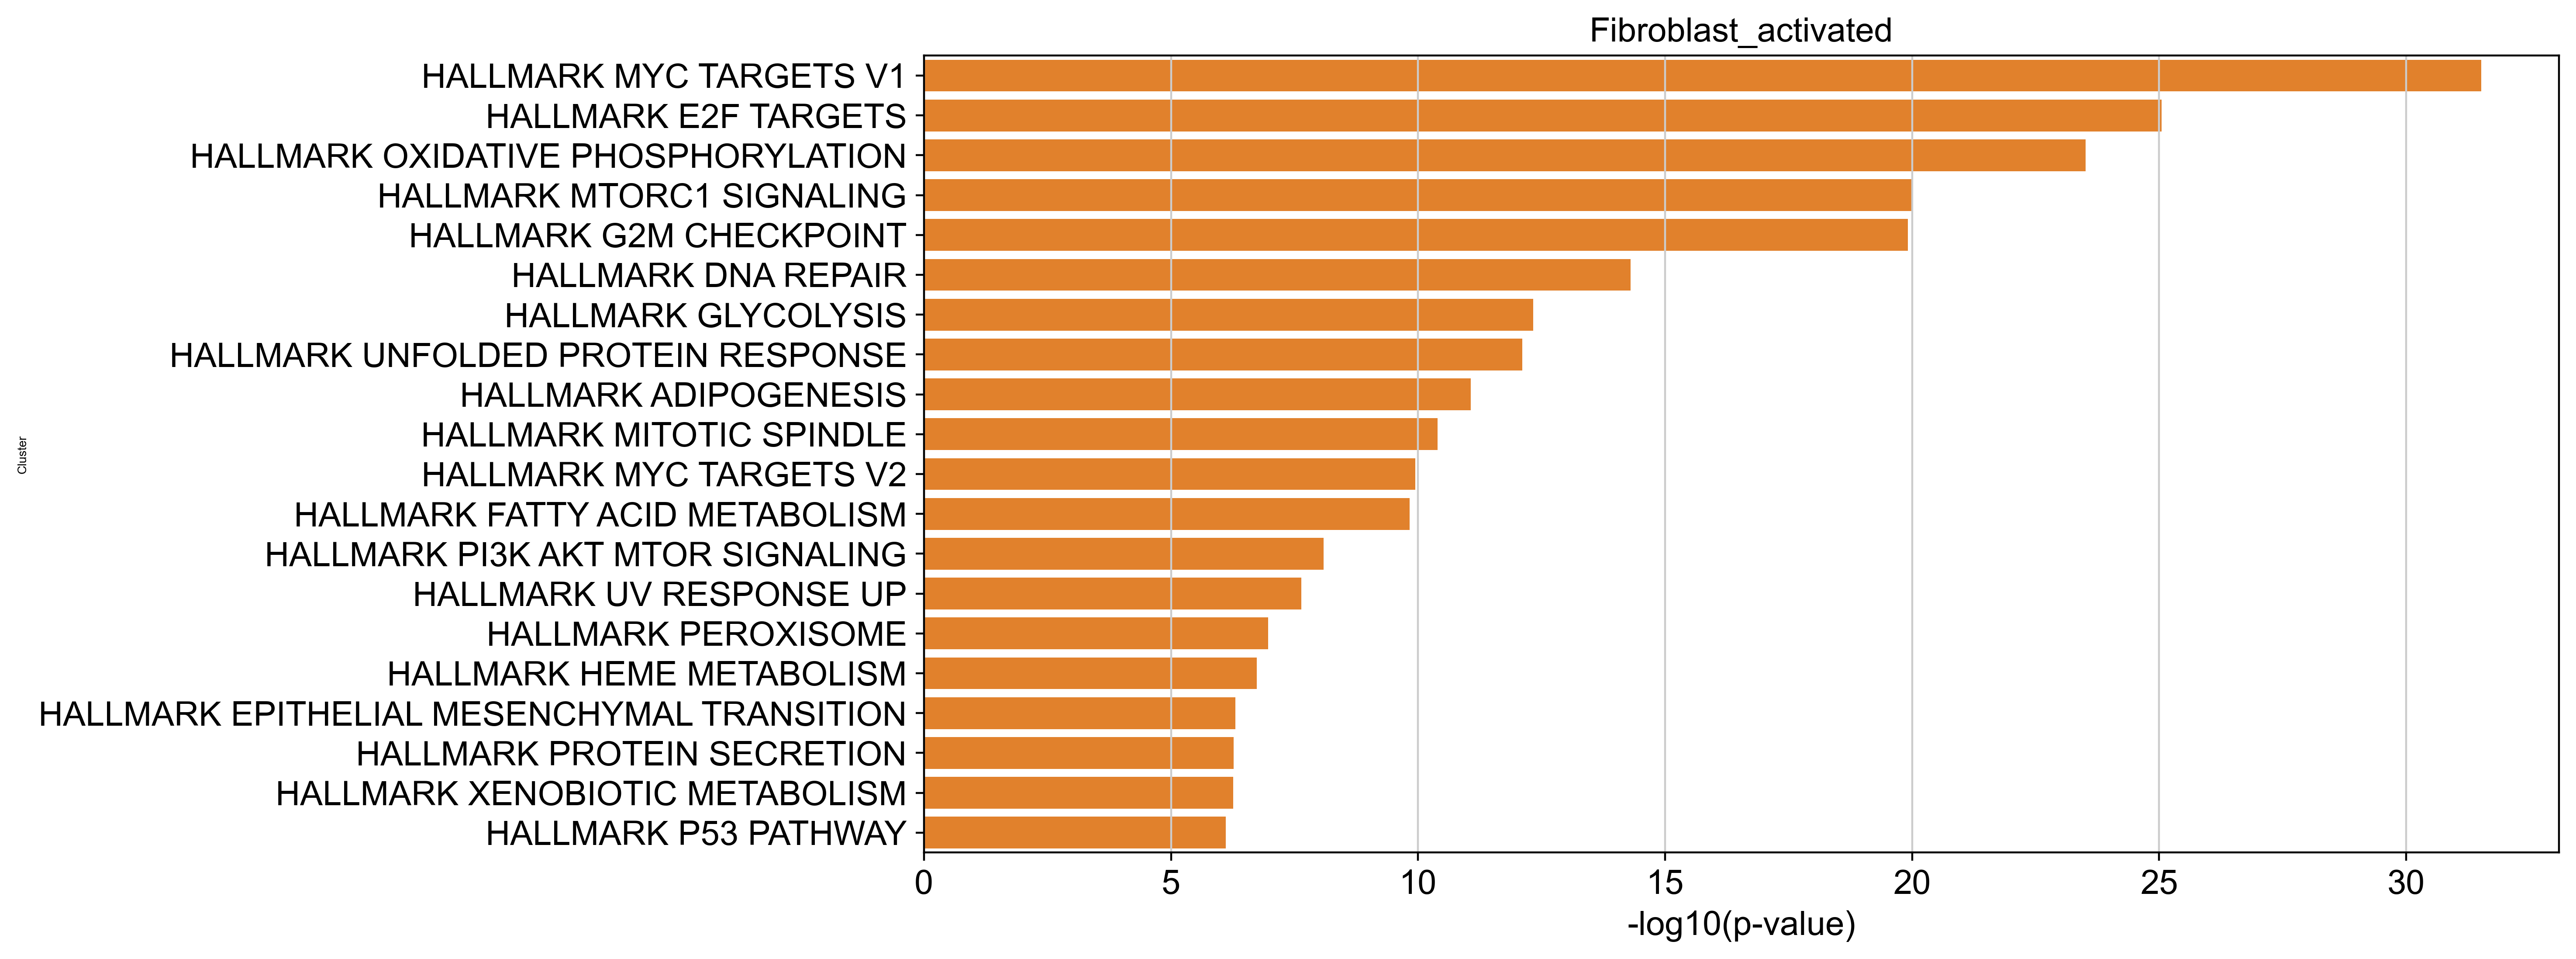

In [ ]:
for col in gsea_results.columns:
    if col.endswith("_pval"):
        data = gsea_results.sort_values(col).head(20)
        score = col.replace('_pval', '_score')
        score_col = data[score]
        print(score_col)
        colors = np.where(score_col < 0, "C0", "C1")
        fig, ax = plt.subplots(figsize=(12, 6))
        ax = sns.barplot(
            x=-np.log10(data[col].head(20)),
            y=data[col].index[:20].str.replace('_', ' '), # replace underscores with spaces
            palette=colors,
            ax=ax
        )
        ax.set_xlabel("-log10(p-value)")
        ax.set_ylabel("Cluster")
        ax.yaxis.label.set_size(5)
        ax.set_title(col[:-5])
        plt.show()

###Correcting pval

In [ ]:
import pandas as pd
from statsmodels.stats.multitest import multipletests

# select columns that end with "pval"
pval_cols = gsea_results.filter(like='pval')

# apply Benjamini-Hochberg correction for multiple hypothesis testing to the selected columns
pval_corr = multipletests(pval_cols.values.flatten(), method='fdr_bh')[1]

In [ ]:
# replace the p-values in the original DataFrame with the corrected values
gsea_results[pval_cols.columns] = pval_corr.reshape(pval_cols.shape)


In [ ]:
folder='/content/drive/MyDrive/CIP_v3_data/CIP_all/GSEA/'
# save the dataframe as a csv file
gsea_results.to_csv(folder+'aPSC_wilcoxon_Hallmark_correctedPvalBH.csv', index=True)

#plotting activated fibroblast GSEA -- corrected pval

In [ ]:
import re

# Define a function to convert text to proper case
def proper_case(text):
    lst_exceptions = ['DNA', 'E2F', 'G2M', 'UV', 'PI3K']

    # Remove the word "HALLMARK" (case-insensitive) from any point in the text
    text = re.sub('(?i)HALLMARK', '', text)

    words = text.split('_')
    words = [word.capitalize() if word not in lst_exceptions else word for word in words]
    text = ' '.join(words)

    # Replace text after capitalization
    text = re.sub('(?i)MTORC1', 'mTORC1', text)
    text = re.sub('(?i)PI3K Akt Mtor', 'PI3K/Akt/mTOR', text)

    return text

In [ ]:
# Apply the proper_case function to the index column
gsea_results.index = gsea_results.index.map(proper_case)

# Print the updated dataframe
print(gsea_results)

                                    Fibroblast_score  Fibroblast_norm  \
source                                                                  
 Adipogenesis                              -0.519104        -6.710372   
 Allograft Rejection                       -0.486537        -4.454370   
 Androgen Response                         -0.436489        -3.735567   
 Angiogenesis                              -0.377012        -1.773777   
 Apical Junction                           -0.424542        -4.700017   
 Apical Surface                            -0.357220        -1.734185   
 Apoptosis                                 -0.298045        -3.044220   
 Bile Acid Metabolism                      -0.364250        -3.069710   
 Cholesterol Homeostasis                   -0.487108        -3.776314   
 Coagulation                                0.428665         3.345665   
 Complement                                -0.332268        -3.382753   
 DNA Repair                                -0.65924

In [ ]:
plt.rcParams['font.family']=['Arial']
plt.rcParams['figure.figsize']=(7,7)
plt.rcParams['figure.dpi']=200

In [ ]:
pathways=[' Myc Targets V1', ' E2F Targets', ' Oxidative Phosphorylation',
       ' mTORC1 Signaling', ' G2M Checkpoint', ' DNA Repair', ' Glycolysis',
       ' Unfolded Protein Response', ' Mitotic Spindle',
       ' Myc Targets V2', ' Fatty Acid Metabolism', ' PI3K/Akt/mTOR Signaling', ' Peroxisome',
       ' Epithelial Mesenchymal Transition']

source
 Myc Targets V1                      -0.810242
 E2F Targets                         -0.707976
 Oxidative Phosphorylation           -0.707114
 mTORC1 Signaling                    -0.672638
 G2M Checkpoint                      -0.679753
 DNA Repair                          -0.659245
 Glycolysis                          -0.577833
 Unfolded Protein Response           -0.672484
 Mitotic Spindle                     -0.508143
 Myc Targets V2                      -0.797213
 Fatty Acid Metabolism               -0.552237
 PI3K/Akt/mTOR Signaling             -0.605767
 Peroxisome                          -0.571886
 Epithelial Mesenchymal Transition   -0.420003
Name: Fibroblast_score, dtype: float32


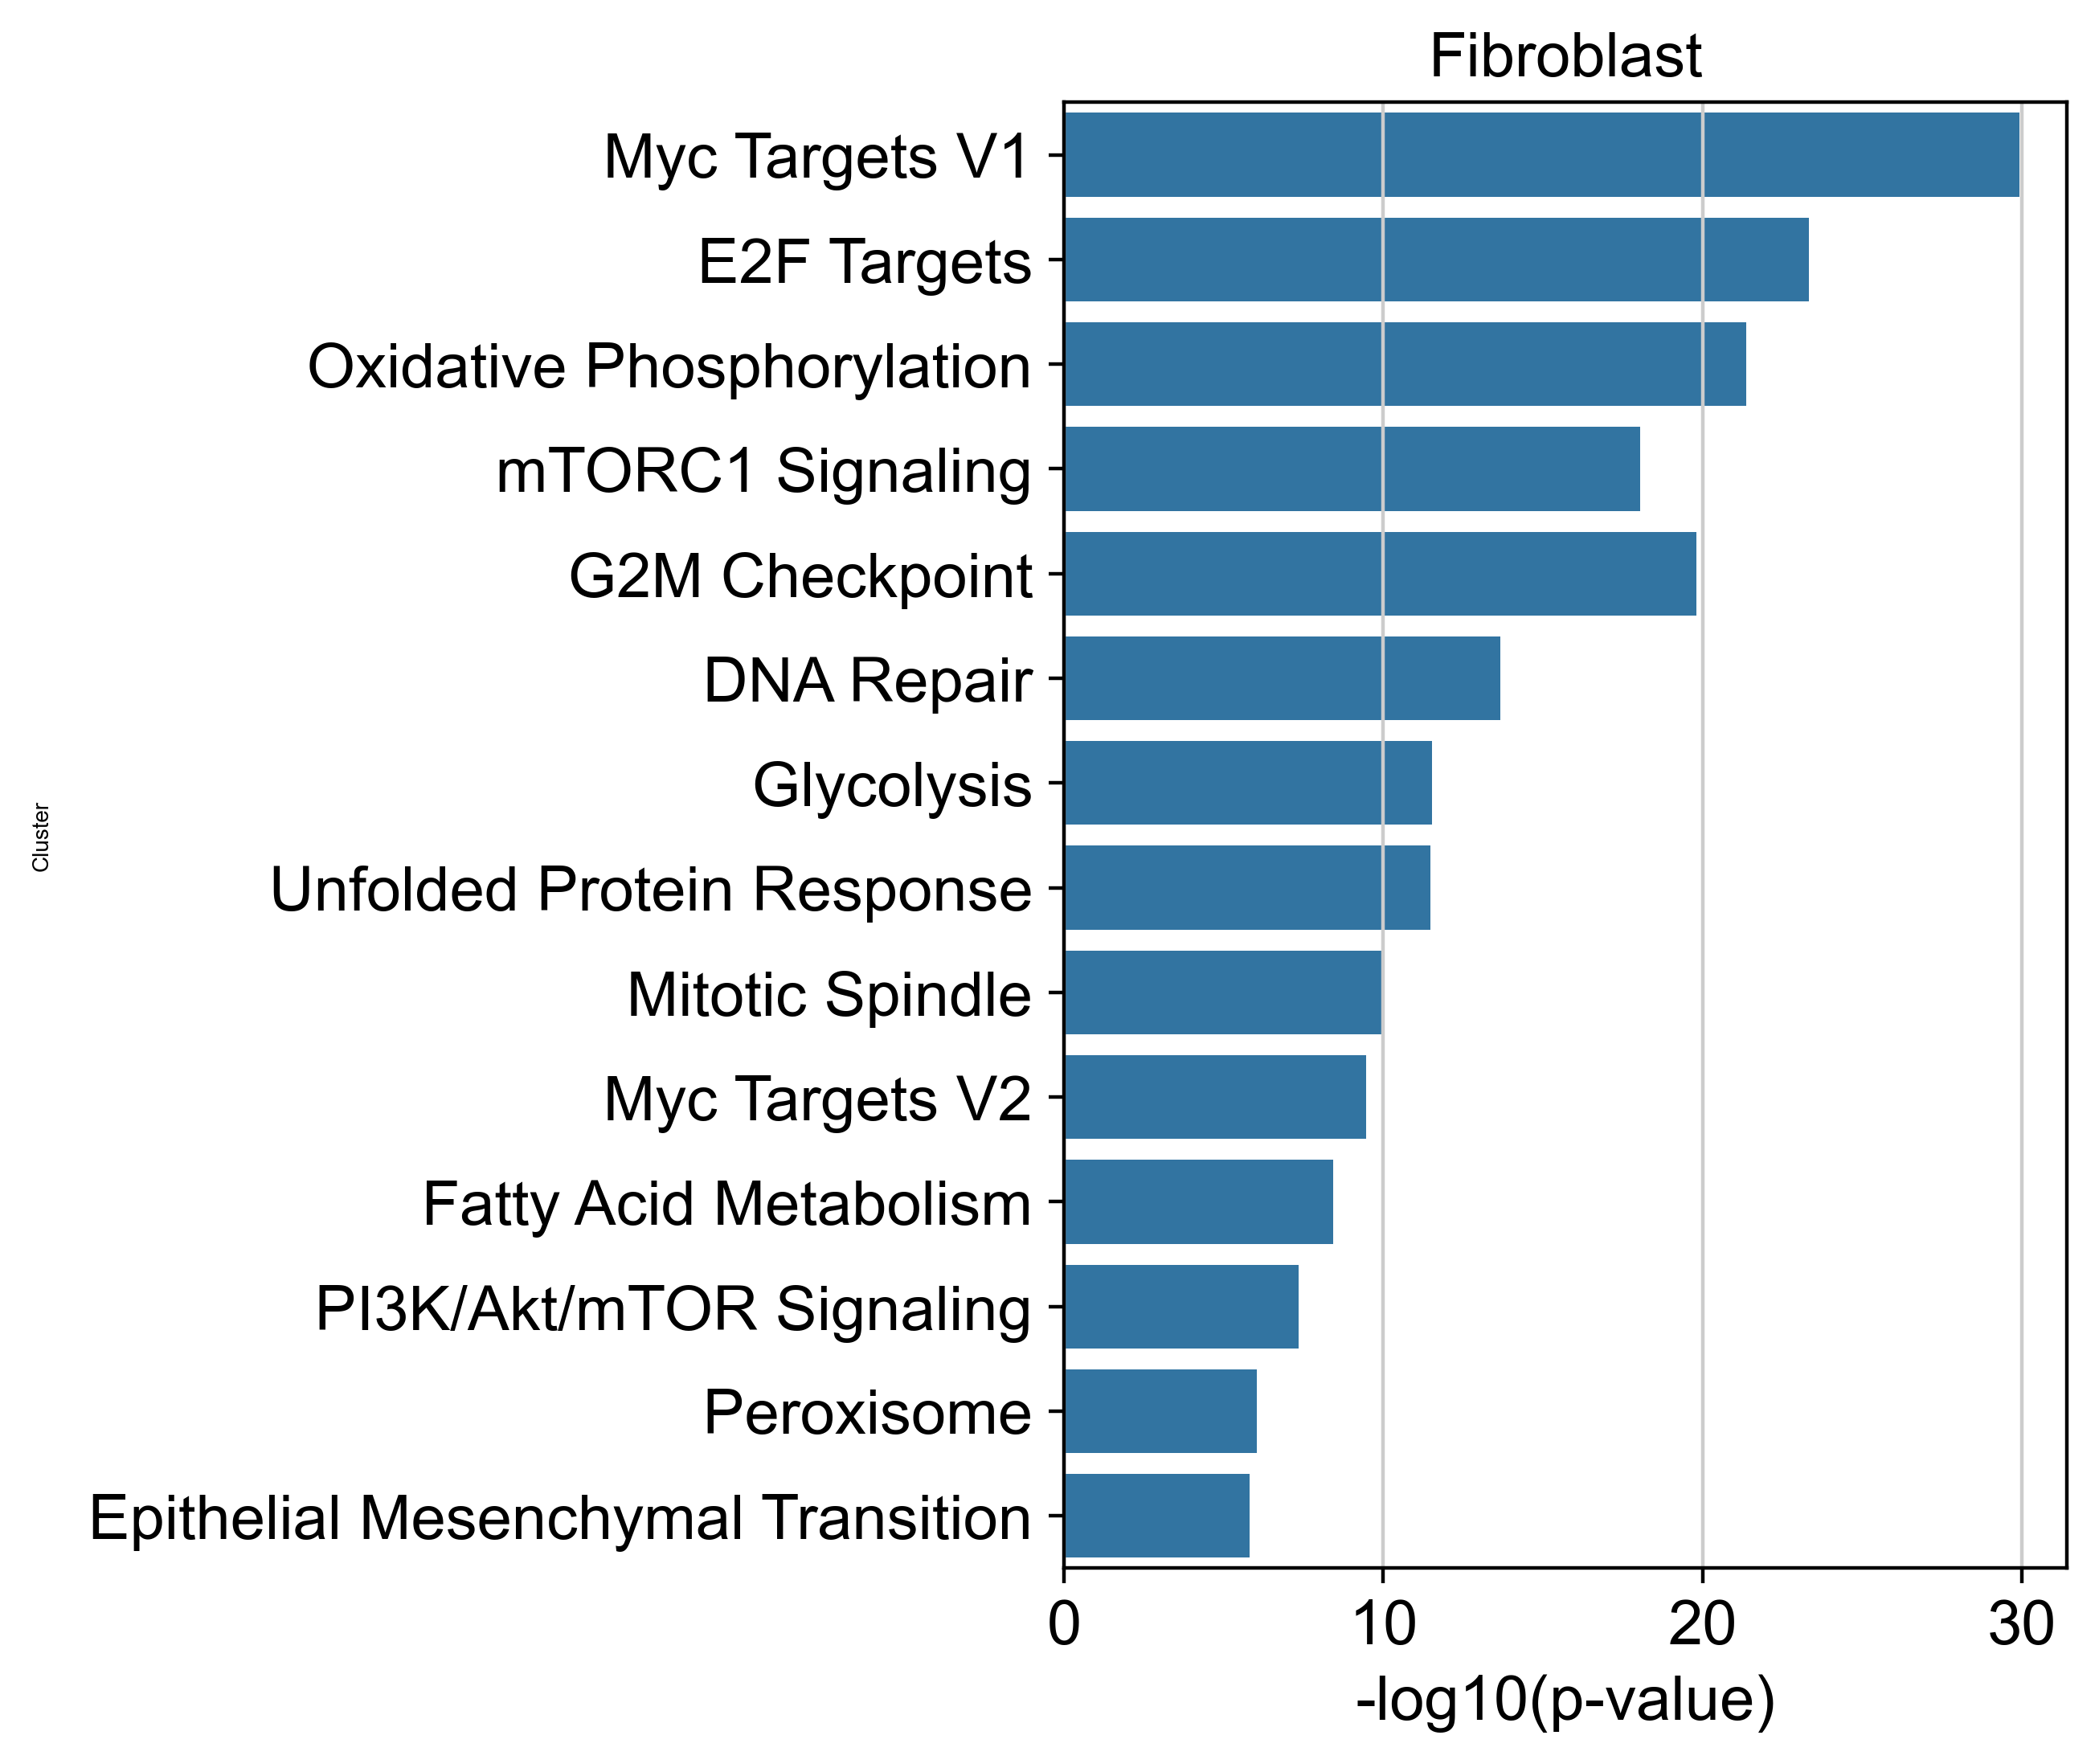

source
 Myc Targets V1                       0.810242
 E2F Targets                          0.707976
 Oxidative Phosphorylation            0.707114
 mTORC1 Signaling                     0.672638
 G2M Checkpoint                       0.679753
 DNA Repair                           0.659245
 Glycolysis                           0.577833
 Unfolded Protein Response            0.672484
 Mitotic Spindle                      0.508143
 Myc Targets V2                       0.797213
 Fatty Acid Metabolism                0.552237
 PI3K/Akt/mTOR Signaling              0.605767
 Peroxisome                           0.571886
 Epithelial Mesenchymal Transition    0.420003
Name: Fibroblast_activated_score, dtype: float32


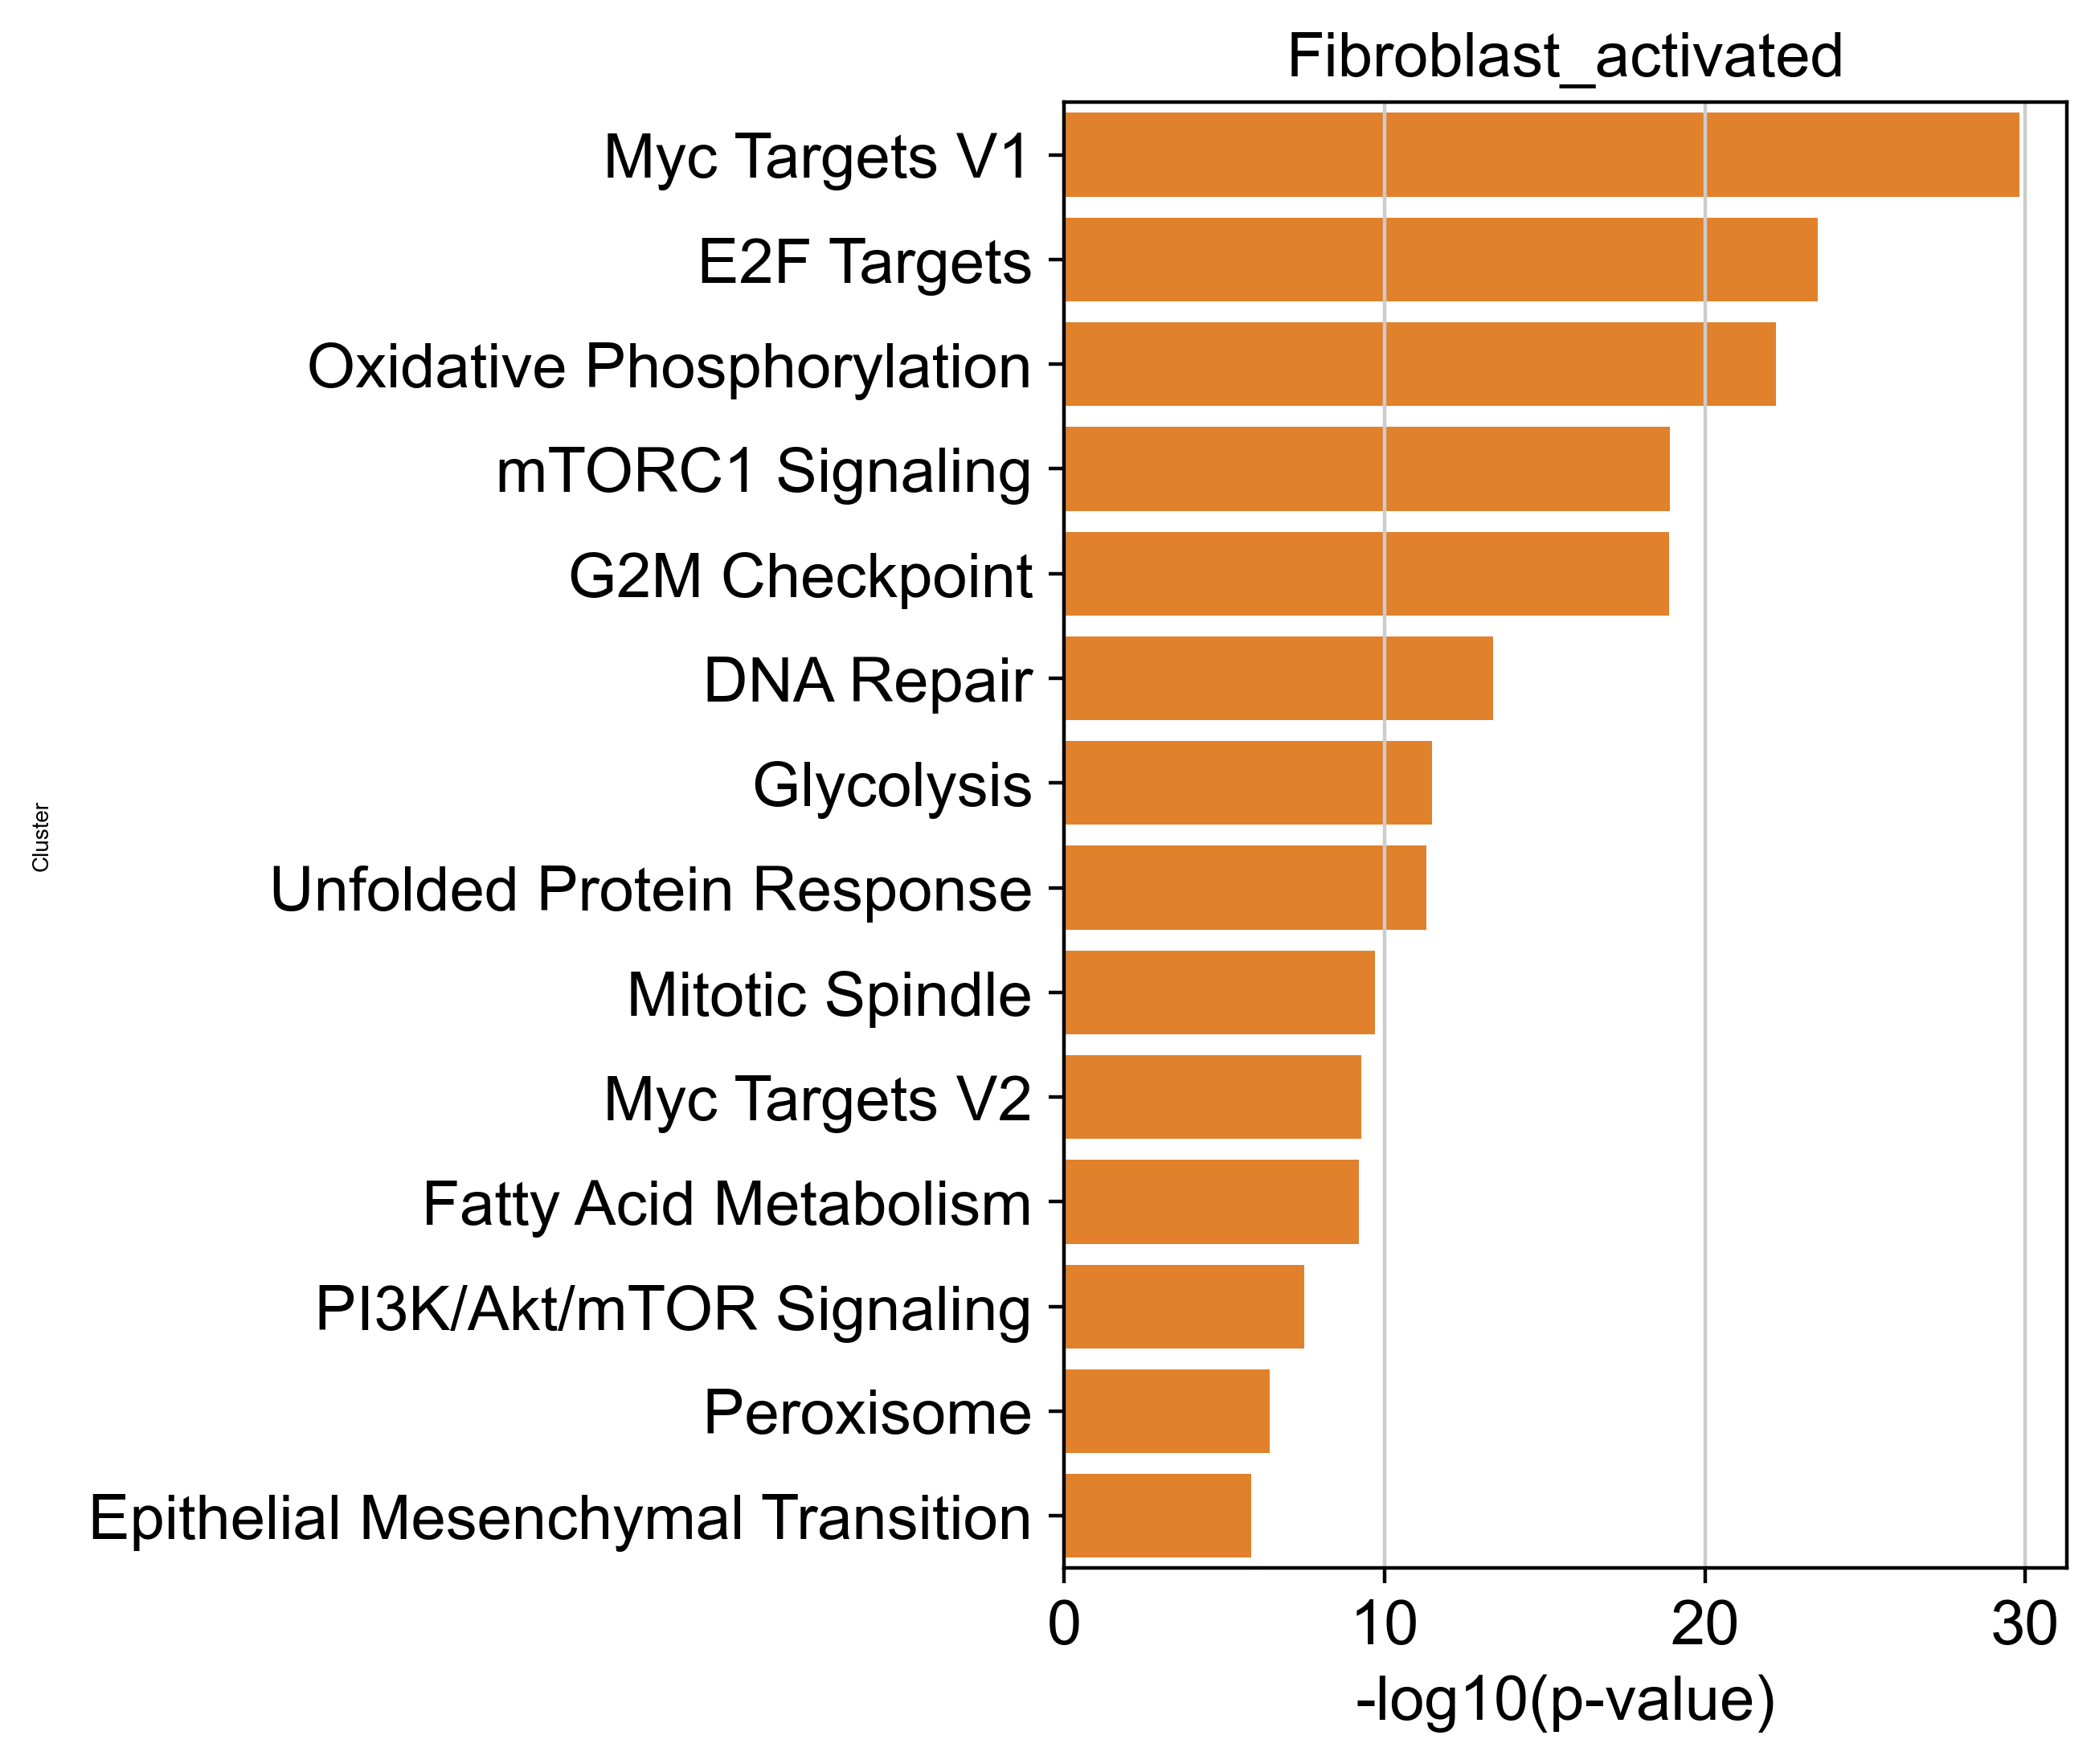

In [ ]:

# Set the font size
plt.rcParams['font.size'] = 14  # You can adjust this value as needed

for col in gsea_results.columns:
    if col.endswith("_pval"):
        # Get the data with row names specified in the list "pathways"
        data = gsea_results.loc[pathways]
        score = col.replace('_pval', '_score')
        score_col = data[score]
        print(score_col)
        colors = np.where(score_col < 0, "C0", "C1")
        fig, ax = plt.subplots(figsize=(4, 6))
        ax = sns.barplot(
            x=-np.log10(data[col]),
            y=data[col].index.str.replace('_', ' '), # replace underscores with spaces
            palette=colors,
            ax=ax
        )
        ax.set_xlabel("-log10(p-value)")
        ax.set_ylabel("Cluster")
        ax.yaxis.label.set_size(5)
        ax.set_title(col[:-5])
        plt.show()